### Notebook to prepare the full north dataset used for training of different models, combining different code throughout this repo


In [1]:
# Importing Libraries

import pandas as pd
import healpy as hp
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from astropy.coordinates import SkyCoord, Latitude, Longitude
from dustmaps.sfd import SFDQuery
from dustmaps.config import config

config['data_dir'] = '/Users/edgareggert/astrostatistics/data_preprocessing/.dustmapsrc'
from desiutil.plots import plot_sky_binned, plot_healpix_map

# Defining important metrics and functions

# Setting NSIDE values
NSIDE = 512
NPIX = hp.nside2npix(NSIDE)
print(
    "Approximate resolution at NSIDE {} is {:.2} deg".format(
        NSIDE, hp.nside2resol(NSIDE, arcmin=True) / 60
    )
)
print(
    "Approximate pix area at NSIDE {} is {:.2} deg".format(
        NSIDE, hp.nside2pixarea(NSIDE, degrees=True)))


def raDec2thetaPhi(ra, dec):
    return (0.5 * np.pi - np.deg2rad(dec)), (np.deg2rad(ra))

### 1. Get a catalogue of all objects in the Galaxy Survey and prepare the north area

### NORTH

Approximate resolution at NSIDE 512 is 0.11 deg
Approximate pix area at NSIDE 512 is 0.013 deg


In [125]:
df_north = pd.read_csv('../../bricks_data/galaxy_catalogue_north.csv',
                       dtype={'LRG': 'int8', 'ELG': 'int8', 'QSO': 'int8', 'GLBG': 'int8', 'RLBG': 'int8'})
df_north = df_north.drop_duplicates()
# Removing all Lines with Nan that were added to ensure that all bricks are stored
df_north = df_north.dropna(axis=0, inplace=False, how='any')

print(len(df_north))

38033493


### 2. Get Galaxy Count per Healpy Pixel


In [126]:
# LRG

df_LRG = df_north[df_north["LRG"] == 1]
ra_LRG = df_LRG["RA"].to_numpy(copy=True)
dec_LRG = df_LRG["DEC"].to_numpy(copy=True)
theta, phi = raDec2thetaPhi(ra_LRG, dec_LRG)

print("Number of LRGs in Sample:", len(ra_LRG))

LRG_pixel_indices = hp.ang2pix(NSIDE, theta, phi)

# Finding out unique indices and how often they appear --> shows the density of LRGs in this pixel
(unique, counts) = np.unique(LRG_pixel_indices, return_counts=True)
mean_LRG = counts.mean()
print("Mean LRGs per Pixel:", mean_LRG)
# Calculating Densities for every block

#density_LRG = (counts / mean_LRG) - 1
id_density = np.stack((unique, counts), axis=1)
#print(id_density)
df_lrg = pd.DataFrame(id_density, columns=['pixel_id', 'lrg'])
df_lrg.pixel_id = df_lrg.pixel_id.astype(int)

# elg

df_ELG = df_north[df_north["ELG"] == 1]
ra_ELG = df_ELG["RA"].to_numpy(copy=True)
dec_ELG = df_ELG["DEC"].to_numpy(copy=True)
theta, phi = raDec2thetaPhi(ra_ELG, dec_ELG)

print("Number of ELGs in Sample:", len(ra_ELG))

ELG_pixel_indices = hp.ang2pix(NSIDE, theta, phi)

# Finding out unique indices and how often they appear --> shows the density of LRGs in this pixel
(unique, counts) = np.unique(ELG_pixel_indices, return_counts=True)
mean_ELG = counts.mean()
print("Mean ELGs per Pixel:", mean_ELG)
# Calculating Densities for every block
#density_ELG = (counts / mean_ELG) - 1
id_density = np.stack((unique, counts), axis=1)
df_elg = pd.DataFrame(id_density, columns=['pixel_id', 'elg'])
df_elg.pixel_id = df_elg.pixel_id.astype(int)

# QSO
df_QSO = df_north[df_north["QSO"] == 1]
ra_QSO = df_QSO["RA"].to_numpy(copy=True)
dec_QSO = df_QSO["DEC"].to_numpy(copy=True)
theta, phi = raDec2thetaPhi(ra_QSO, dec_QSO)

print("Number of QSOs in Sample:", len(ra_QSO))

QSO_pixel_indices = hp.ang2pix(NSIDE, theta, phi)

# Finding out unique indices and how often they appear --> shows the density of LRGs in this pixel
(unique, counts) = np.unique(QSO_pixel_indices, return_counts=True)
mean_QSO = counts.mean()
print("Mean QSOs per Pixel:", mean_QSO)
# Calculating Densities for every block
#density_QSO = (counts / mean_QSO) - 1
id_density = np.stack((unique, counts), axis=1)
df_qso = pd.DataFrame(id_density, columns=['pixel_id', 'qso'])
df_qso.pixel_id = df_qso.pixel_id.astype(int)

# GLBG
df_GLBG = df_north[df_north["GLBG"] == 1]
ra_GLBG = df_GLBG["RA"].to_numpy(copy=True)
dec_GLBG = df_GLBG["DEC"].to_numpy(copy=True)
theta, phi = raDec2thetaPhi(ra_GLBG, dec_GLBG)

print("Number of GLBGs in Sample:", len(ra_GLBG))

GLBG_pixel_indices = hp.ang2pix(NSIDE, theta, phi)

# Finding out unique indices and how often they appear --> shows the density of LRGs in this pixel
(unique, counts) = np.unique(GLBG_pixel_indices, return_counts=True)
mean_GLBG = counts.mean()
print("Mean GLBGs per Pixel:", mean_GLBG)
# Calculating Densities for every block
#density_QSO = (counts / mean_QSO) - 1
id_density = np.stack((unique, counts), axis=1)
df_glbg = pd.DataFrame(id_density, columns=['pixel_id', 'glbg'])
df_glbg.pixel_id = df_glbg.pixel_id.astype(int)

# RLBG
df_RLBG = df_north[df_north["RLBG"] == 1]
ra_RLBG = df_RLBG["RA"].to_numpy(copy=True)
dec_RLBG = df_RLBG["DEC"].to_numpy(copy=True)
theta, phi = raDec2thetaPhi(ra_RLBG, dec_RLBG)

print("Number of RLBGs in Sample:", len(ra_RLBG))

RLBG_pixel_indices = hp.ang2pix(NSIDE, theta, phi)

# Finding out unique indices and how often they appear --> shows the density of LRGs in this pixel
(unique, counts) = np.unique(RLBG_pixel_indices, return_counts=True)
mean_RLBG = counts.mean()
print("Mean RLBGs per Pixel:", mean_RLBG)
# Calculating Densities for every block
#density_QSO = (counts / mean_QSO) - 1
id_density = np.stack((unique, counts), axis=1)
df_rlbg = pd.DataFrame(id_density, columns=['pixel_id', 'rlbg'])
df_rlbg.pixel_id = df_rlbg.pixel_id.astype(int)

# Merging
df_north = pd.merge(df_lrg, df_elg, how='outer', on='pixel_id')
df_north = pd.merge(df_north, df_qso, how='outer', on='pixel_id')
df_north = pd.merge(df_north, df_glbg, how='outer', on='pixel_id')
df_north = pd.merge(df_north, df_rlbg, how='outer', on='pixel_id')

df_north.fillna(value=0, inplace=True)
df_north = df_north.astype(int)

print(f'Pixels in the Northern Catalogue: {len(df_north)}')
print(df_north.shape)

Number of LRGs in Sample: 3326485
Mean LRGs per Pixel: 8.56394604934235
Number of ELGs in Sample: 12187120
Mean ELGs per Pixel: 31.283838938716418
Number of QSOs in Sample: 1727402
Mean QSOs per Pixel: 4.530866723322108
Number of GLBGs in Sample: 11974587
Mean GLBGs per Pixel: 30.7387488448506
Number of RLBGs in Sample: 9794363
Mean RLBGs per Pixel: 25.143601249688732
Pixels in the Northern Catalogue: 389708
(389708, 6)


### 3. Plotting Galaxy Densities

0.0 180.0 -180.0 180.0


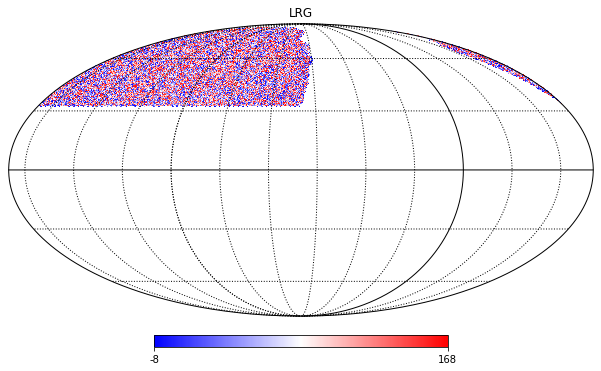

In [127]:
m_LRG = np.zeros(NPIX)

m_LRG[df_north.pixel_id.to_numpy()] = df_north.lrg.to_numpy()
mask = (m_LRG == 0)
m_LRG[mask] = np.nan
hp.mollview(m_LRG, title="LRG", format='%i', norm='hist', cmap="bwr", notext=False, rot=(100, 0, 0), badcolor='white',
            remove_dip=True, remove_mono=True)

hp.graticule()


0.0 180.0 -180.0 180.0


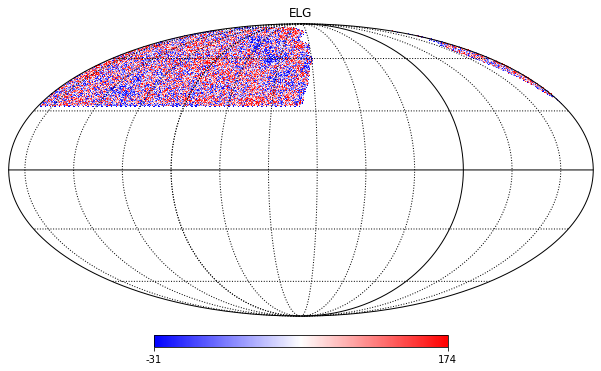

In [128]:
m_ELG = np.zeros(NPIX)

m_ELG[df_north.pixel_id.to_numpy()] = df_north.elg.to_numpy()
mask = (m_ELG == 0)
m_ELG[mask] = np.nan
hp.mollview(m_ELG, title="ELG", format='%i', norm='hist', cmap="bwr", notext=False, rot=(100, 0, 0), badcolor='white',
            remove_dip=True, remove_mono=True)
hp.graticule()

0.0 180.0 -180.0 180.0


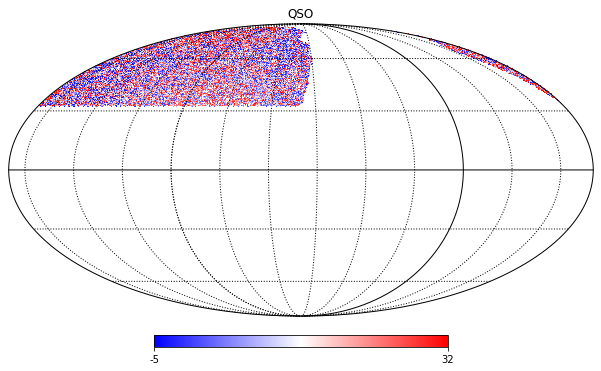

In [129]:
m_QSO = np.zeros(NPIX)

m_QSO[df_north.pixel_id.to_numpy()] = df_north.qso.to_numpy()
mask = (m_QSO == 0)
m_QSO[mask] = np.nan
hp.mollview(m_QSO, title="QSO", format='%i', norm='hist', cmap="bwr", notext=False, rot=(100, 0, 0), badcolor='white',
            remove_dip=True, remove_mono=True)
hp.graticule()

0.0 180.0 -180.0 180.0


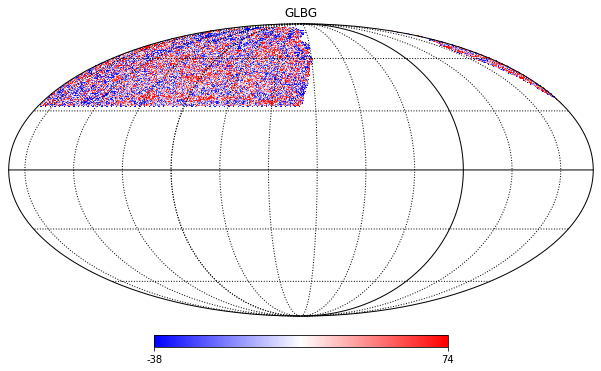

In [130]:
m_GLBG = np.zeros(NPIX)

m_GLBG[df_north.pixel_id.to_numpy()] = df_north.glbg.to_numpy()
mask = (m_GLBG == 0)
m_GLBG[mask] = np.nan
hp.mollview(m_GLBG, title="GLBG", format='%i', norm='hist', cmap="bwr", notext=False, rot=(100, 0, 0), badcolor='white',
            remove_dip=True, remove_mono=True)
hp.graticule()

0.0 180.0 -180.0 180.0


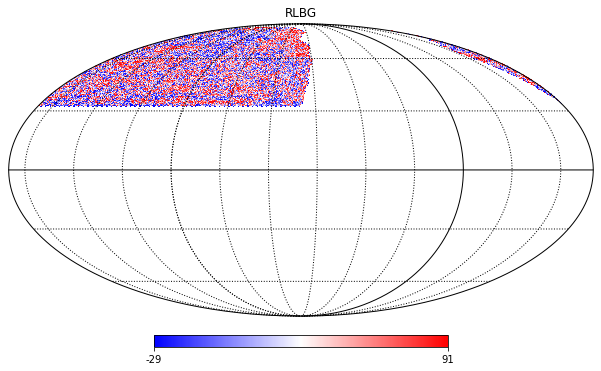

In [131]:
m_RLBG = np.zeros(NPIX)

m_RLBG[df_north.pixel_id.to_numpy()] = df_north.rlbg.to_numpy()
mask = (m_RLBG == 0)
m_RLBG[mask] = np.nan
hp.mollview(m_RLBG, title="RLBG", format='%i', norm='hist', cmap="bwr", notext=False, rot=(100, 0, 0), badcolor='white',
            remove_dip=True, remove_mono=True)
hp.graticule()

In [132]:
# Getting Exposure Densities across pixels
with open(f'../../bricks_data/pixel2ccd_{NSIDE}.pickle', 'rb') as f:
    pixel2ccd_dict = pickle.load(f)
    f.close()

In [133]:
pix_ids = df_north.pixel_id.to_numpy()
exp_len = np.zeros(len(pix_ids))
for i, pix in enumerate(pix_ids):
    exp_len[i] = len(pixel2ccd_dict[pix])
df_north['exposures'] = exp_len

In [134]:
df_north.exposures = df_north.exposures.astype(int)

0.0 180.0 -180.0 180.0


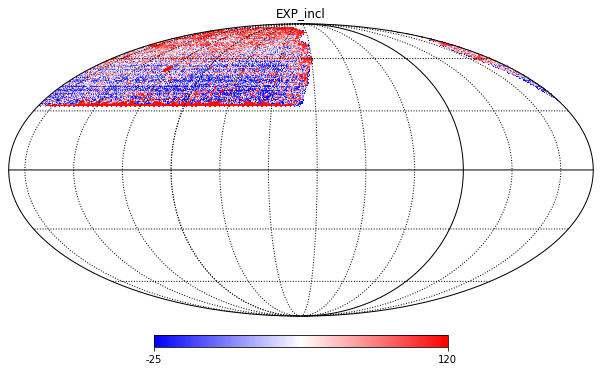

In [135]:
m_EXP = np.zeros(NPIX)

m_EXP[df_north.pixel_id.to_numpy()] = df_north.exposures.to_numpy()
mask = (m_EXP == 0)
m_EXP[mask] = np.nan
hp.mollview(m_EXP, title="EXP_incl", format='%i', norm='hist', cmap="bwr", notext=False, rot=(100, 0, 0),
            badcolor='white',
            remove_dip=True, remove_mono=True)
hp.graticule()

### 4. Importing the Systematics Values and Appending them to the df.


#### a. Stellar Density

In [136]:
# Import New Systematics here --> maps by Boris
m_hinh = hp.read_map("../../bricks_data/systematics_maps/HINH_512_NEST.fits")
m_gaia = hp.read_map("../../bricks_data/systematics_maps/GaiaEDR3_Gmag_gt17_512_NEST.fits")
m_gaia12 = hp.read_map("../../bricks_data/systematics_maps/GaiaEDR3_12lt_Gmag_gt17_512_NEST.fits")
m_sagitarius = hp.read_map("../../bricks_data/systematics_maps/SagitariusDR2_512_NEST.fits")

m_hinh = hp.reorder(map_in=m_hinh, n2r=True)
m_gaia = hp.reorder(map_in=m_gaia, n2r=True)
m_gaia12 = hp.reorder(map_in=m_gaia12, n2r=True)
m_sagitarius = hp.reorder(map_in=m_sagitarius, n2r=True)

unique = np.arange(NPIX)

id_density = np.stack((unique, m_hinh, m_gaia, m_gaia12, m_sagitarius), axis=1)

df_hinh = pd.DataFrame(id_density, columns=['pixel_id', 'hinh', 'gaia', 'gaia12', 'sagitarius'])
df_hinh.pixel_id = df_hinh.pixel_id.astype(int)

df_north = pd.merge(df_north, df_hinh, how='inner', on='pixel_id')

In [137]:

#Plot all stellar maps across the full sky
"""m_gaia = hp.read_map("../../bricks_data/systematics_maps/GaiaEDR3_Gmag_gt17_512_NEST.fits")
mask = (m_gaia == 0)
m_gaia[mask] = np.nan
hp.mollview(m_gaia, title="gaia", format='%i', nest=True, norm='hist', cmap="bwr", notext=False, rot=(100, 0, 0), badcolor='white',
            remove_dip=True, remove_mono=True)
hp.graticule()

m_sagitarius = hp.read_map("../../bricks_data/systematics_maps/SagitariusDR2_512_NEST.fits")

mask = (m_sagitarius == 0)
m_sagitarius[mask] = np.nan
hp.mollview(m_sagitarius, title="sagitarius", nest=True, format='%i', norm='hist', cmap="bwr", notext=False, rot=(100, 0, 0), badcolor='white',
            remove_dip=True, remove_mono=True)
hp.graticule()

m_gaia12 = hp.read_map("../../bricks_data/systematics_maps/GaiaEDR3_12lt_Gmag_gt17_512_NEST.fits")
mask = (m_gaia12 == 0)
m_gaia12[mask] = np.nan
hp.mollview(m_gaia12, title="gaia12lt", format='%i', nest=True, norm='hist', cmap="bwr", notext=False, rot=(100, 0, 0), badcolor='white',
            remove_dip=True, remove_mono=True)
hp.graticule()

m_hinh = hp.read_map("../../bricks_data/systematics_maps/HINH_512_NEST.fits")

mask = (m_hinh == 0)
m_hinh[mask] = np.nan
hp.mollview(m_hinh, title="hinh", nest=True, format='%i', norm='hist', cmap="bwr", notext=False, rot=(100, 0, 0), badcolor='white',
            remove_dip=True, remove_mono=True)
hp.graticule()"""

'm_gaia = hp.read_map("../../bricks_data/systematics_maps/GaiaEDR3_Gmag_gt17_512_NEST.fits")\nmask = (m_gaia == 0)\nm_gaia[mask] = np.nan\nhp.mollview(m_gaia, title="gaia", format=\'%i\', nest=True, norm=\'hist\', cmap="bwr", notext=False, rot=(100, 0, 0), badcolor=\'white\',\n            remove_dip=True, remove_mono=True)\nhp.graticule()\n\nm_sagitarius = hp.read_map("../../bricks_data/systematics_maps/SagitariusDR2_512_NEST.fits")\n\nmask = (m_sagitarius == 0)\nm_sagitarius[mask] = np.nan\nhp.mollview(m_sagitarius, title="sagitarius", nest=True, format=\'%i\', norm=\'hist\', cmap="bwr", notext=False, rot=(100, 0, 0), badcolor=\'white\',\n            remove_dip=True, remove_mono=True)\nhp.graticule()\n\nm_gaia12 = hp.read_map("../../bricks_data/systematics_maps/GaiaEDR3_12lt_Gmag_gt17_512_NEST.fits")\nmask = (m_gaia12 == 0)\nm_gaia12[mask] = np.nan\nhp.mollview(m_gaia12, title="gaia12lt", format=\'%i\', nest=True, norm=\'hist\', cmap="bwr", notext=False, rot=(100, 0, 0), badcolor=\'wh

0.0 180.0 -180.0 180.0


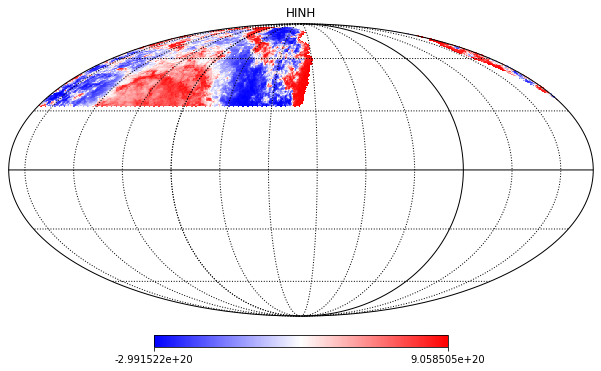

In [138]:
m_hinh = np.zeros(NPIX)

m_hinh[df_north.pixel_id.to_numpy()] = df_north.hinh.to_numpy()
mask = (m_hinh == 0)
m_hinh[mask] = np.nan
hp.mollview(m_hinh, title="HINH", format='%e', norm='hist', cmap="bwr", notext=False, rot=(100, 0, 0),
            badcolor='white', remove_dip=True, remove_mono=True)
hp.graticule()


0.0 180.0 -180.0 180.0


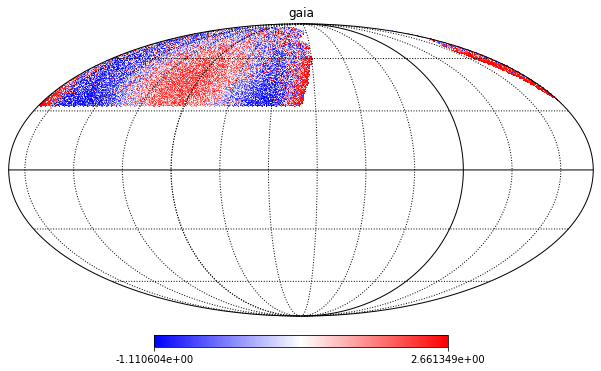

In [139]:
m_gaia = np.zeros(NPIX)

m_gaia[df_north.pixel_id.to_numpy()] = df_north.gaia.to_numpy()
mask = (m_gaia == 0)
m_gaia[mask] = np.nan
hp.mollview(m_gaia, title="gaia", format='%e', norm='hist', cmap="bwr", notext=False, rot=(100, 0, 0),
            badcolor='white', remove_dip=True, remove_mono=True)
hp.graticule()


0.0 180.0 -180.0 180.0


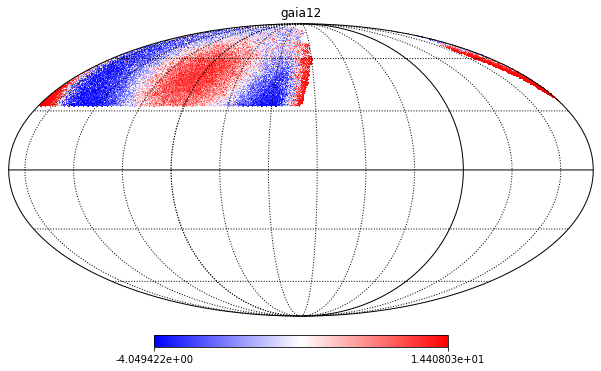

In [140]:
m_gaia12 = np.zeros(NPIX)

m_gaia12[df_north.pixel_id.to_numpy()] = df_north.gaia12.to_numpy()
mask = (m_gaia12 == 0)
m_gaia12[mask] = np.nan
hp.mollview(m_gaia12, title="gaia12", format='%e', norm='hist', cmap="bwr", notext=False, rot=(100, 0, 0),
            badcolor='white', remove_dip=True, remove_mono=True)
hp.graticule()



0.0 180.0 -180.0 180.0


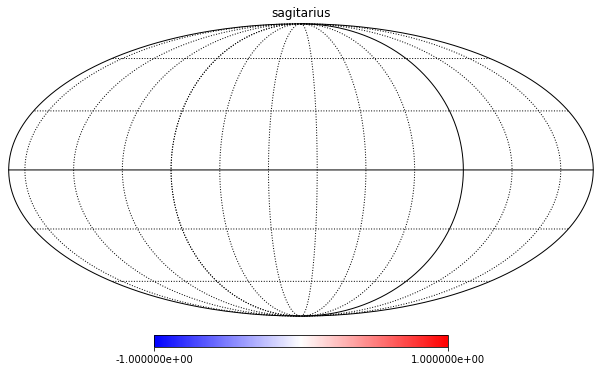

In [141]:
m_sagitarius = np.zeros(NPIX)

m_sagitarius[df_north.pixel_id.to_numpy()] = df_north.sagitarius.to_numpy()
mask = (m_sagitarius == 0)
m_sagitarius[mask] = np.nan
hp.mollview(m_sagitarius, title="sagitarius", format='%e', norm='hist', cmap="bwr", notext=False, rot=(100, 0, 0),
            badcolor='white', remove_dip=True, remove_mono=True)
hp.graticule()

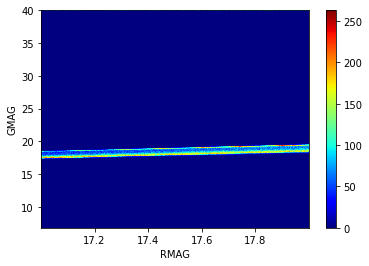

In [142]:
# ToDo: Adapt here to read different metrics and sys maps

df_stellar = pd.read_csv('../../bricks_data/stellar_catalogue_north.csv')

label_1 = 'RMAG'
label_2 = 'GMAG'

plt.hist2d(df_stellar[label_1], df_stellar[label_2], bins=1000, cmap='jet')
plt.xlabel(label_1)
plt.ylabel(label_2)
plt.colorbar()
plt.show()

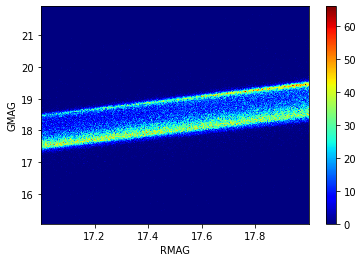

In [143]:
df_stellar['GMR'] = df_stellar['GMAG'] - df_stellar['RMAG']
df_stellar['RMZ'] = df_stellar['RMAG'] - df_stellar['ZMAG']
df_stellar = df_stellar[(df_stellar['GMAG'] > 15) & (df_stellar['GMAG'] < 30)]
df_stellar = df_stellar[(df_stellar['ZMAG'] > 15) & (df_stellar['ZMAG'] < 30)]
df_stellar = df_stellar[(df_stellar['GMR'] > -2) & (df_stellar['GMR'] < 4)]
df_stellar = df_stellar[(df_stellar['RMZ'] > -2) & (df_stellar['RMZ'] < 4)]

plt.hist2d(df_stellar[label_1], df_stellar[label_2], bins=1000, cmap='jet')
plt.xlabel(label_1)
plt.ylabel(label_2)
plt.colorbar()
plt.show()


In [144]:
#Dividing RMAG Column into 1000 equally filled bins (assuming within the RMAG of 17-18 this is somewhat uniform)
df_stellar['percent_RMAG'] = pd.qcut(df_stellar['RMAG'], q=1000, labels=False)
#grouped = df.groupby('percent_RMAG', as_index=False).sem()
grouped = df_stellar.groupby('percent_RMAG')
zscore = lambda x: abs((x - x.median()) / x.std())
df_stellar['Z_SCORE_RMZ'] = grouped['RMZ'].transform(zscore)
df_stellar['Z_SCORE_GMR'] = grouped['GMR'].transform(zscore)
#Dividing RMAG Column into 100 equally filled bins (assuming within the RMAG of 17-18 this is somewhat uniform)
df_stellar['percent_GMR'] = pd.qcut(df_stellar['GMR'], q=1000, labels=False)
df_stellar['percent_RMZ'] = pd.qcut(df_stellar['RMZ'], q=1000, labels=False)
#grouped = df.groupby('percent_RMAG', as_index=False).sem()
grouped = df_stellar.groupby('percent_GMR')
df_stellar['Z_SCORE_RMZ'] = grouped['RMZ'].transform(zscore)

#grouped = df.groupby('percent_RMAG', as_index=False).sem()
grouped = df_stellar.groupby('percent_RMZ')
df_stellar['Z_SCORE_GMR'] = grouped['GMR'].transform(zscore)
print(df_stellar.shape)
df_stellar = df_stellar[(df_stellar['Z_SCORE_GMR'] < 3)]
print(df_stellar.shape)
df_stellar = df_stellar[(df_stellar['Z_SCORE_RMZ'] < 3)]
df_stellar.shape

(3464029, 12)
(3436156, 12)


(3414224, 12)

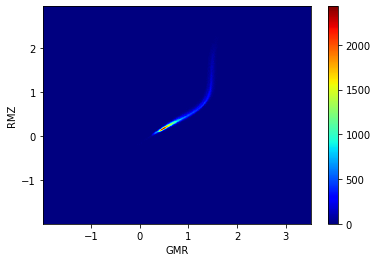

In [145]:
label_1 = 'GMR'
label_2 = 'RMZ'

plt.hist2d(df_stellar[label_1], df_stellar[label_2], bins=1000, cmap='jet')
plt.xlabel(label_1)
plt.ylabel(label_2)
plt.colorbar()
plt.show()

In [146]:
ra_stellar = df_stellar["RA"].to_numpy(copy=True)
dec_stellar = df_stellar["DEC"].to_numpy(copy=True)
theta, phi = raDec2thetaPhi(ra_stellar, dec_stellar)

print("Number of stellars in Sample:", len(ra_stellar))

stellar_pixel_indices = hp.ang2pix(NSIDE, theta, phi)

# Finding out unique indices and how often they appear --> shows the density of LRGs in this pixel
(unique, counts) = np.unique(stellar_pixel_indices, return_counts=True)
mean_stellar = counts.mean()
print("Mean stellars per Pixel:", mean_stellar)
# Calculating Densities for every block
density_stellar = (counts / mean_stellar) - 1
id_density = np.stack((unique, counts), axis=1)
df_stellar = pd.DataFrame(id_density, columns=['pixel_id', 'stellar'])
df_stellar.pixel_id = df_stellar.pixel_id.astype(int)

Number of stellars in Sample: 3414224
Mean stellars per Pixel: 8.732053023153512


In [147]:
df_north = df_north.merge(df_stellar, how='left', on='pixel_id')
df_north.fillna(value=0)

,pixel_id,lrg,elg,qso,glbg,rlbg,exposures,hinh,gaia,gaia12,sagitarius,stellar
0,6477,1,1,0,2,1,9,5.555363e+20,0.9375,4.3125,0.0,0.0
1,6478,2,6,0,10,13,5,5.797568e+20,1.3125,4.0625,0.0,0.0
2,6479,1,10,0,5,4,10,6.061287e+20,0.8125,3.9375,0.0,0.0
3,6481,1,16,3,18,3,6,6.453394e+20,0.8750,3.8125,0.0,2.0
4,6482,1,7,1,11,4,9,6.406237e+20,0.6875,3.5000,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
389703,467146,0,0,0,0,1,8,4.775745e+20,3.3750,20.4375,0.0,1.0
389704,476863,0,0,0,0,1,8,4.499423e+20,3.8750,23.1875,0.0,1.0
389705,506606,0,0,0,0,2,5,6.036297e+20,3.7500,24.9375,0.0,1.0
389706,638510,0,0,0,0,1,11,1.589656e+21,3.6875,15.0625,0.0,1.0


0.0 180.0 -180.0 180.0


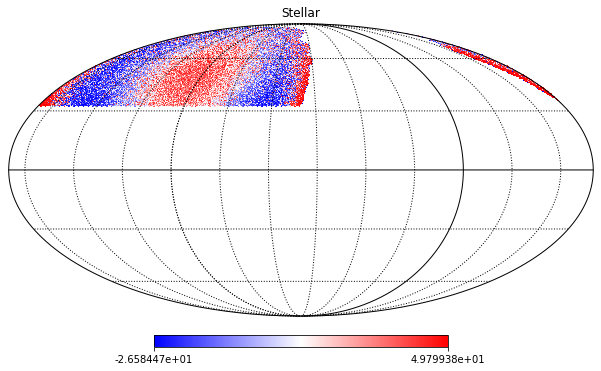

In [148]:
m_Stellar = np.zeros(NPIX)

m_Stellar[df_north.pixel_id.to_numpy()] = df_north.stellar.to_numpy()
mask = (m_Stellar == 0)
m_Stellar[mask] = np.nan
hp.mollview(m_Stellar, title="Stellar", format='%e', norm='hist', cmap="bwr", notext=False, rot=(100, 0, 0),
            badcolor='white', remove_dip=True, remove_mono=True)
hp.graticule()

In [149]:
## Getting the centers of each pixel in my corpus as RaDec
pixels_ids = df_north["pixel_id"].to_numpy()
subpixel_coords = hp.pix2ang(NSIDE, pixels_ids, lonlat=True)
ra_ebv = subpixel_coords[0]
dec_ebv = subpixel_coords[1]
#Querying their position on the SFD dustmap
sfd = SFDQuery()
coords = SkyCoord(ra_ebv, dec_ebv, frame='icrs', unit='deg')
ebv = sfd(coords)
df_north["EBV"] = ebv

0.0 180.0 -180.0 180.0


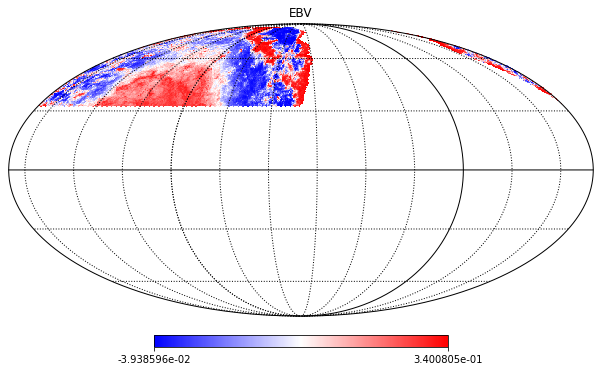

In [150]:
m_EBV = np.zeros(NPIX)

m_EBV[df_north.pixel_id.to_numpy()] = df_north.EBV.to_numpy()
mask = (m_EBV == 0)
m_EBV[mask] = np.nan
hp.mollview(m_EBV, title="EBV", format='%e', norm='hist', cmap="bwr", notext=False, rot=(100, 0, 0), badcolor='white',
            remove_dip=True, remove_mono=True)
hp.graticule()

### Work in Coverage Stats and Other Systematics

In [151]:
m_coverage = hp.read_map("../../bricks_data/masks/mask_512.fits")
m_coverage = hp.reorder(map_in=m_coverage, n2r=True)

unique = np.arange(NPIX)

id_density = np.stack((unique, m_coverage), axis=1)

df_bad_pix = pd.DataFrame(id_density, columns=['pixel_id', 'coverage'])
df_bad_pix.pixel_id = df_bad_pix.pixel_id.astype(int)
df_bad_pix = df_bad_pix[df_bad_pix.coverage == 1]


0.0 180.0 -180.0 180.0


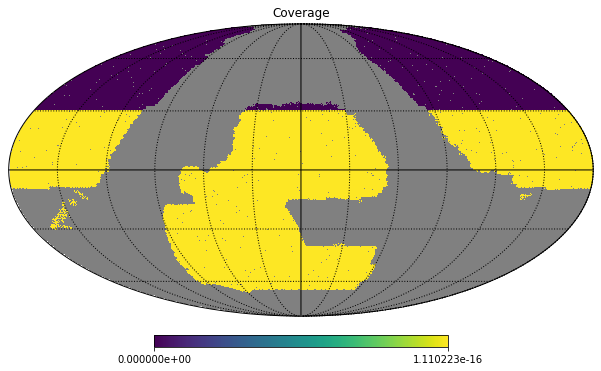

In [152]:
m_cover = np.zeros(NPIX)

m_cover[df_bad_pix.pixel_id.to_numpy()] = df_bad_pix.coverage.to_numpy()
mask = (m_cover < 1)
m_cover[mask] = np.nan
hp.mollview(m_cover, title="Coverage", format='%e', norm='hist', cmap="viridis", notext=False, rot=(0, 0, 0),
            badcolor='gray',
            remove_dip=True, remove_mono=True)
hp.graticule()

In [153]:
print(len(df_north))
df_north = pd.merge(df_north, df_bad_pix, how='inner', on='pixel_id')
print(len(df_north))

389708
385256


### Extracting Systematics

In [154]:
with open('../../bricks_data/pixel2systematics_geometric_512_2048_inclusive.pickle', 'rb') as f:
    geo_dict_inc = pickle.load(f)
    f.close()
sys_list = []
for key in geo_dict_inc.keys():
    ind_sys_list = geo_dict_inc[key]
    ind_sys_list.append(key)
    sys_list.append(ind_sys_list)

df_sys_geo_inc = pd.DataFrame(sys_list, columns=['airmass',
                                                 'ccdskysb_g',
                                                 'ccdskysb_r',
                                                 'ccdskysb_z',
                                                 'exptime_g',
                                                 'exptime_r',
                                                 'exptime_z',
                                                 'meansky_g',
                                                 'meansky_r',
                                                 'meansky_z',
                                                 'galdepth_g',
                                                 'galdepth_r',
                                                 'galdepth_z',
                                                 'seeing_g',
                                                 'seeing_r',
                                                 'seeing_z',
                                                 'psfdepth_g',
                                                 'psfdepth_r',
                                                 'psfdepth_z',
                                                 'psfnorm_mean_g',
                                                 'psfnorm_mean_r',
                                                 'psfnorm_mean_z',
                                                 'gausspsfdepth_g',
                                                 'gausspsfdepth_r',
                                                 'gausspsfdepth_z',
                                                 'pixel_covered',
                                                 'pixel_id'])

df_north = df_north.merge(df_sys_geo_inc, how='inner', on='pixel_id')
print(len(df_north))
df_north.dropna(axis=0, inplace=True)


385256


In [155]:
df_north.to_csv('../../bricks_data/uncleaned_systematics_north.csv', index=False)


cols = list(df_north.columns)
cols.remove('pixel_id')
nrows = 39
ncols = 1
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(200, 200))

#fig = plt.figure()
i = 0
for ax in ax.flatten():
    elem = cols[i]

    m = np.zeros(NPIX)

    m[df_north.pixel_id.to_numpy()] = df_north[elem].to_numpy()
    mask = (m == 0)
    m[mask] = np.nan
    plt.axes(ax)
    hp.mollview(m, title=elem, fig=fig, sub=(nrows, ncols, i + 1), format='%e', norm='hist', cmap="bwr", notext=False,
                rot=(120, 0, 0), badcolor='white',
                remove_dip=True, remove_mono=True, hold=True)
    #hp.graticule()
    i += 1

plt.show()

In [156]:
### Removing all pixels from the other corpus


df_north['RA'], df_north['DEC'] = hp.pix2ang(nside=NSIDE, ipix=df_north.pixel_id.to_numpy(), lonlat=True)

df_north.head()
df_no_island = df_north[df_north.DEC < 15]

df_comp = df_north[df_north.DEC > 20]

m = np.zeros(NPIX)

m[df_no_island.pixel_id.to_numpy()] = 100
mask = (m == 0)
m[mask] = np.nan
hp.mollview(m, title='Cut area', format='%e', norm='hist', cmap="jet", notext=False, rot=(120, 0, 0), badcolor='white',
            remove_dip=True, remove_mono=True, hold=True)

m = np.zeros(NPIX)

m[df_comp.pixel_id.to_numpy()] = df_comp['pixel_covered'].to_numpy()
mask = (m == 0)
m[mask] = np.nan
hp.mollview(m, title='exposures', format='%e', norm='hist', cmap="jet", notext=False, rot=(120, 0, 0), badcolor='white',
            remove_dip=True, remove_mono=True, hold=True)


In [157]:
#### Removing All Outliers


m = np.zeros(NPIX)

m[df_no_island.pixel_id.to_numpy()] = 100
mask = (m == 0)
m[mask] = np.nan
hp.mollview(m, title='Cut area', format='%e', norm='hist', cmap="jet", notext=False, rot=(120, 0, 0), badcolor='white',
            remove_dip=True, remove_mono=True, hold=True)

m = np.zeros(NPIX)

m[df_comp.pixel_id.to_numpy()] = df_comp['pixel_covered'].to_numpy()
mask = (m == 0)
m[mask] = np.nan
hp.mollview(m, title='exposures', format='%e', norm='hist', cmap="jet", notext=False, rot=(120, 0, 0), badcolor='white',
            remove_dip=True, remove_mono=True, hold=True)


#### Removing All Outliers


In [11]:
df_north = pd.read_csv('../../bricks_data/uncleaned_systematics_north.csv')


df_no_outlier = df_north.drop(columns=['galdepth_g',
                                       'galdepth_r',
                                       'galdepth_z',
                                       'psfdepth_g',
                                       'psfdepth_r',
                                       'psfdepth_z',
                                       'psfnorm_mean_g',
                                       'psfnorm_mean_r',
                                       'psfnorm_mean_z',
                                       'gausspsfdepth_g',
                                       'gausspsfdepth_r',
                                       'gausspsfdepth_z', 'coverage'])

col = list(df_no_outlier.columns)
print(col)

['pixel_id', 'lrg', 'elg', 'qso', 'glbg', 'rlbg', 'exposures', 'hinh', 'gaia', 'gaia12', 'sagitarius', 'stellar', 'EBV', 'airmass', 'ccdskysb_g', 'ccdskysb_r', 'ccdskysb_z', 'exptime_g', 'exptime_r', 'exptime_z', 'meansky_g', 'meansky_r', 'meansky_z', 'seeing_g', 'seeing_r', 'seeing_z', 'pixel_covered']


In [13]:
# Switch to Median Absolute Deviation
# cut pixels that are outside of [median - 10 * median_absolute_deviation, median + 10 * median_absolute_deviation)


names = [
       #'exposures',
       'EBV',
       'hinh', 'gaia', 'gaia12', 'stellar', 'airmass',
       'ccdskysb_g', 'ccdskysb_r', 'ccdskysb_z',
       'exptime_g', 'exptime_r', 'exptime_z',
       'seeing_g', 'seeing_r', 'seeing_z',
       'meansky_g', 'meansky_r', 'meansky_z',
       #'galdepth_g', 'galdepth_r', 'galdepth_z',
       #'psfdepth_g', 'psfdepth_r', 'psfdepth_z',
       #'psfnorm_mean_g','psfnorm_mean_r', 'psfnorm_mean_z',
       #'gausspsfdepth_g', 'gausspsfdepth_r', 'gausspsfdepth_z'
]



import scipy.stats
print(len(df_no_outlier))
for elem in names:
    mad = scipy.stats.median_abs_deviation(df_no_outlier[elem], scale='normal')
    med = df_no_outlier[elem].median()
    low, high = med - 10 * mad, med + 10 * mad
    df_no_outlier['MAD'] = df_no_outlier[elem].between(low, high, inclusive='neither')
    print(f"Element: {elem} | No of Elems with MAD outside interval : {len(df_no_outlier[(df_no_outlier['MAD'] ==  False)])}")
    #df_no_outlier = df_no_outlier[(df_no_outlier['MAD'] == True)]

print()
print(f"Galaxies Remaining before outlier removal: {len(df_north)}")
print(f"Galaxies Remaining after outlier removal: {len(df_no_outlier)}")
print(f"Elements cut by outlier removal: {len(df_north) - len(df_no_outlier)}")

378636
Element: EBV | No of Elems with MAD outside interval : 862
Element: hinh | No of Elems with MAD outside interval : 279
Element: gaia | No of Elems with MAD outside interval : 60
Element: gaia12 | No of Elems with MAD outside interval : 2276
Element: stellar | No of Elems with MAD outside interval : 752
Element: airmass | No of Elems with MAD outside interval : 0
Element: ccdskysb_g | No of Elems with MAD outside interval : 650
Element: ccdskysb_r | No of Elems with MAD outside interval : 13
Element: ccdskysb_z | No of Elems with MAD outside interval : 3
Element: exptime_g | No of Elems with MAD outside interval : 0
Element: exptime_r | No of Elems with MAD outside interval : 0
Element: exptime_z | No of Elems with MAD outside interval : 0
Element: seeing_g | No of Elems with MAD outside interval : 467
Element: seeing_r | No of Elems with MAD outside interval : 431
Element: seeing_z | No of Elems with MAD outside interval : 580
Element: meansky_g | No of Elems with MAD outside in

In [160]:
factor = 7
print(len(df_no_outlier))
for elem in col:
    if elem == 'stellar':
        factor = 7
    df_no_outlier['Z'] = df_no_outlier[elem].transform(zscore)
    print("Element: ", elem, "| No of Elems with Z higher than factor  : ",
          len(df_no_outlier[(df_no_outlier['Z'] > factor)]), "Remaining Gals: ", len(df_no_outlier))
    df_no_outlier = df_no_outlier[(df_no_outlier['Z'] < factor)]

print()
print(f"Galaxies Remaining before outlier removal: {len(df_north)}")
print(f"Galaxies Remaining after outlier removal: {len(df_no_outlier)}")
print(f"Elements cut by outlier removal: {len(df_north) - len(df_no_outlier)}")

310034
Element:  pixel_id | No of Elems with Z higher than factor  :  0 Remaining Gals:  310034
Element:  lrg | No of Elems with Z higher than factor  :  37 Remaining Gals:  310034
Element:  elg | No of Elems with Z higher than factor  :  0 Remaining Gals:  309997
Element:  qso | No of Elems with Z higher than factor  :  6 Remaining Gals:  309997
Element:  glbg | No of Elems with Z higher than factor  :  0 Remaining Gals:  309991
Element:  rlbg | No of Elems with Z higher than factor  :  0 Remaining Gals:  309991
Element:  exposures | No of Elems with Z higher than factor  :  0 Remaining Gals:  309991
Element:  hinh | No of Elems with Z higher than factor  :  0 Remaining Gals:  309991
Element:  gaia | No of Elems with Z higher than factor  :  0 Remaining Gals:  309991
Element:  gaia12 | No of Elems with Z higher than factor  :  0 Remaining Gals:  309991
Element:  sagitarius | No of Elems with Z higher than factor  :  0 Remaining Gals:  309991
Element:  stellar | No of Elems with Z high

col = list(df_no_outlier.columns)
col.remove('pixel_id')
col.remove('Z')
print(len(col))
df_noout = df_no_outlier
nrows = 20
ncols = 1
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(150,150))

#fig = plt.figure()
i = 0
for ax in ax.flatten():
    elem = col[i]
    df_noout['Z'] = df_no_outlier[elem].transform(

    )

    df_outlier = df_noout[(df_noout['Z'] > 7)]

    m = np.zeros(NPIX)

    m[df_outlier.pixel_id.to_numpy()] = 1
    mask = (m == 0)
    m[mask] = np.nan

    plt.axes(ax)
    hp.mollview(m, title=elem, fig=fig, sub=(nrows, ncols, i + 1), min=-5, max=2, cbar=False, cmap="Reds", notext=False,
                rot=(120, 0, 0), badcolor='white',
                remove_dip=True, remove_mono=True, hold=True)
    #hp.graticule()
    i += 1

plt.show()

(0, 29)
nan
nan
nan
0
0
0
(0, 29)


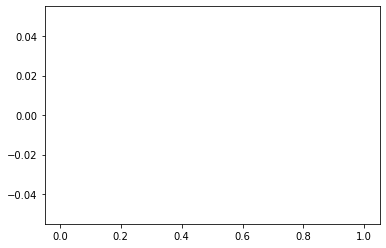

In [161]:
print(df_no_outlier.shape)
print(df_no_outlier.exposures.max())
print(df_no_outlier.exposures.mean())
print(df_no_outlier.exposures.median())
print(len(df_no_outlier[df_no_outlier.exposures > 150]))
print(len(df_no_outlier[df_no_outlier.pixel_covered < 0.9]))
plt.hist(df_no_outlier.exposures)

print(len(df_no_outlier[df_no_outlier.exposures < 7]))

df_no_outlier = df_no_outlier[df_no_outlier.exposures < 150]
df_no_outlier = df_no_outlier[df_no_outlier.pixel_covered > 0.9]
print(df_no_outlier.shape)
df_no_outlier.exposures.max()
df_no_outlier = df_no_outlier.drop(columns=['pixel_covered', 'Z'])

### Scaling the Data

In [162]:
scaler = MinMaxScaler()
#scaler = RobustScaler()

df_scaled = df_no_outlier

cololo = list(df_scaled.columns)
print(cololo)
cololo.remove('pixel_id')
cololo.remove('lrg')
cololo.remove('elg')
cololo.remove('qso')
cololo.remove('glbg')
cololo.remove('rlbg')
df_scaled[cololo] = scaler.fit_transform(df_no_outlier[cololo])

['pixel_id', 'lrg', 'elg', 'qso', 'glbg', 'rlbg', 'exposures', 'hinh', 'gaia', 'gaia12', 'sagitarius', 'stellar', 'EBV', 'airmass', 'ccdskysb_g', 'ccdskysb_r', 'ccdskysb_z', 'exptime_g', 'exptime_r', 'exptime_z', 'meansky_g', 'meansky_r', 'meansky_z', 'seeing_g', 'seeing_r', 'seeing_z', 'MAD']


ValueError: Found array with 0 sample(s) (shape=(0, 21)) while a minimum of 1 is required by MinMaxScaler.

In [ ]:
ra, dec = hp.pix2ang(NSIDE, df_scaled.pixel_id, lonlat=True)
ax = plot_sky_binned(ra, dec, data=df_scaled.lrg, cmap='bwr', label='lrg', plot_type='grid', verbose=True,
                     max_bin_area=0.5)

In [ ]:
ax = plot_sky_binned(ra, dec, data=df_scaled.elg, cmap='bwr', label='elg', plot_type='grid', verbose=True,
                     max_bin_area=0.5)

In [ ]:
ax = plot_sky_binned(ra, dec, data=df_scaled.qso, cmap='bwr', label='qso', plot_type='grid', verbose=True,
                     max_bin_area=0.5)

In [ ]:
ax = plot_sky_binned(ra, dec, data=df_scaled.glbg, cmap='bwr', label='glbg', plot_type='grid', verbose=True,
                     max_bin_area=0.5)

In [ ]:
ax = plot_sky_binned(ra, dec, data=df_scaled.rlbg, cmap='bwr', label='rlbg', plot_type='grid', verbose=True,
                     max_bin_area=0.5)

In [ ]:
df_train, df_test = train_test_split(df_scaled, test_size=0.2, random_state=666, shuffle=True)
print(len(df_train))
print(len(df_test))


df_train.to_csv('../../bricks_data/north.csv', index=False)
df_test.to_csv('../../bricks_data/north_test.csv', index=False)